(7.999999999999998, {1, 2, 3}, {4, 5, 6, 7, 8})
<=7.999999999999998
None


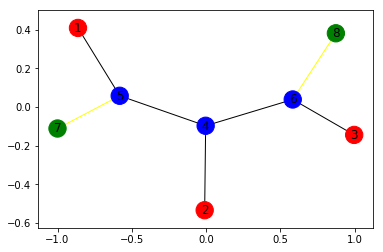

In [82]:
# https://arxiv.org/pdf/1508.04644.pdf

import networkx as nx
import matplotlib.pyplot as plt
from math import log,exp

def dictionaryLookup(theDictionary,defaultValue,query):
    if (query in theDictionary):
        return theDictionary[query]
    else:
        return defaultValue

def somethingNotHere(currentList):
    return (max(currentList)+1)

# is query=d^n for n a natural number
def is_power_of_d(d,query):
    if (d<2):
        print('Error')
        return False
    if query<1:
        return False
    elif query==1:
        return True
    elif ((query % d) != 0):
        return False
    else:
        return is_power_of_d(d,(int)(query/d))

class TensorNetwork():
    def __init__(self,sources,intermediates,targets,edgeData):
        self.sources=sources
        self.intermediates=intermediates
        self.targets=targets
        self.edgeData=edgeData
        self.G=nx.Graph()
        self.G.add_nodes_from(sources,myType='source')
        self.G.add_nodes_from(intermediates,myType='intermediate')
        self.G.add_nodes_from(targets,myType='target')
        for (edge1,edge2,cap) in edgeData:
            self.G.add_edge(edge1,edge2,capacity=cap)
    def drawMe(self,type_to_color=None,capacity_to_color=None):
        if (type_to_color is None):
            type_to_color = {}
        if (capacity_to_color is None):
            capacity_to_color = {}
        nodeColors = lambda query: dictionaryLookup(type_to_color,'red',query)
        edgeColors = lambda query: dictionaryLookup(capacity_to_color,'black',query)
        nx.draw_networkx(self.G,node_color=[nodeColors(self.G.nodes[n]['myType']) for n in self.G.nodes],
                 edge_color=[edgeColors(self.G.edges[i]['capacity']) for i in self.G.edges])
    def quantumMinCut(self):
        fakeNodeData=list(set(self.sources) | set(self.intermediates) | set(self.targets))
        fakeSourceNode=somethingNotHere(fakeNodeData)
        fakeNodeData.append(fakeSourceNode)
        fakeTargetNode=somethingNotHere(fakeNodeData)
        fakeNodeData.append(fakeTargetNode)
        fakeG = nx.Graph()
        fakeG.add_nodes_from(fakeNodeData)
        for (edge1,edge2,cap) in self.edgeData:
            fakeG.add_edge(edge1,edge2,capacity=log(cap))
        for s in self.sources:
            fakeG.add_edge(fakeSourceNode,s)
        for t in self.targets:
            fakeG.add_edge(t,fakeTargetNode)
        cut_value,partition = nx.minimum_cut(fakeG,fakeSourceNode,fakeTargetNode)
        reachable, non_reachable = partition
        reachable = set(reachable) - {fakeSourceNode,fakeTargetNode}
        non_reachable = set(non_reachable) - {fakeSourceNode,fakeTargetNode}
        del fakeG
        del fakeNodeData
        return exp(cut_value), reachable, non_reachable
    def areAllMultipleQudits(self,d):
        returnValue=True
        for (edge1,edge2,cap) in self.edgeData:
            returnValue=is_power_of_d(d,cap)
            if not(returnValue):
                return False
        return returnValue
    def quantumMaxFlow(self):
        knownCase=self.areAllMultipleQudits(2) 
        knownCase = knownCase or self.areAllMultipleQudits(3)
        knownCase = knownCase or self.areAllMultipleQudits(5)
        knownCase = knownCase or self.areAllMultipleQudits(6)
        knownCase = knownCase or self.areAllMultipleQudits(7)
        minCut, reachable, non_reachable = self.quantumMinCut()
        if knownCase:
            return minCut
        else:
            print("<="+str(minCut))
            return None
            
sources = [1,2,3]
intermediates = [4,5,6]
targets = [7,8]
edgeData=[(1,5,2),(2,4,2),(3,6,2),(4,5,2),(4,6,2),(5,7,3),(6,8,3)]
exampleNwk=TensorNetwork(sources,intermediates,targets,edgeData)
type_to_color= {'source': 'red', 'intermediate': 'blue','target': 'green'}
capacity_to_color = {2: 'black',3: 'yellow'}
exampleNwk.drawMe(type_to_color,capacity_to_color)
print(exampleNwk.quantumMinCut())
print(exampleNwk.quantumMaxFlow())